<a href="https://colab.research.google.com/github/denverkim/Advanced-Topics-in-Data-Mining/blob/main/CLASS_LAB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00


In [11]:
import pandas as pd
import random
from faker import Faker
from datetime import date

# Faker 인스턴스 생성
fake = Faker('ko_KR')

# 지역 및 상품 목록 정의
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산']
products = {
    '노트북': 1500000,
    '스마트폰': 1000000,
    '태블릿': 800000,
    '모니터': 500000,
    '헤드폰': 200000,
    '키보드': 100000
}

# 날짜 범위 지정 (datetime.date 객체 사용)
start_date = date(2025, 1, 1)
end_date = date(2025, 9, 1)

# 데이터 생성
data = []
for _ in range(100):
    sale_date = fake.date_between(start_date=start_date, end_date=end_date)
    region = random.choice(regions)
    product = random.choice(list(products.keys()))
    quantity = random.randint(1, 10)
    sales = products[product] * quantity

    data.append({
        'Date (판매일자)': sale_date,
        'Region (지역)': region,
        'Product (상품명)': product,
        'Sales (매출액)': sales,
        'Quantity (판매수량)': quantity
    })

# 데이터프레임으로 변환
df = pd.DataFrame(data)

# CSV 저장 (선택)
df.to_csv('sales_data_100.csv', index=False, encoding='utf-8-sig')

# 결과 출력
print(df.head(10))  # 상위 10개 출력

  Date (판매일자) Region (지역) Product (상품명)  Sales (매출액)  Quantity (판매수량)
0  2025-06-03          대전           헤드폰      1200000                6
1  2025-05-16          부산           태블릿      6400000                8
2  2025-08-27          서울           키보드       700000                7
3  2025-04-08          인천           노트북     10500000                7
4  2025-03-21          인천          스마트폰      5000000                5
5  2025-01-04          대전           노트북      4500000                3
6  2025-02-23          대구           모니터       500000                1
7  2025-04-16          서울           태블릿      2400000                3
8  2025-08-14          인천           헤드폰      1400000                7
9  2025-02-14          부산           키보드      1000000               10


In [13]:
sample_df = pd.read_csv('/content/business_sample_data.csv')
sample_df.head()

,Date,Region,Product,Sales,Quantity
0,2024-02-21,Seoul,Phone,1472,2
1,2024-01-15,Seoul,Phone,1894,2
2,2024-03-12,Incheon,Tablet,759,1
3,2024-03-01,Seoul,Headphones,863,3
4,2024-01-21,Daegu,Phone,1054,2


In [15]:
sample_df.isna().sum()

,0
Date,0
Region,0
Product,0
Sales,0
Quantity,0


In [34]:
import pandas as pd

# 예: 데이터프레임이 df 라고 가정할 때
sample_df['Date'] = pd.to_datetime(sample_df['Date'])  # 날짜형 변환
sample_df['Month'] = sample_df['Date'].dt.month             # 월 추출

# 결과 출력
sample_df.head()

,Date,Region,Product,Sales,Quantity,Month
0,2024-02-21,Seoul,Phone,1472,2,2
1,2024-01-15,Seoul,Phone,1894,2,1
2,2024-03-12,Incheon,Tablet,759,1,3
3,2024-03-01,Seoul,Headphones,863,3,3
4,2024-01-21,Daegu,Phone,1054,2,1


In [48]:
sample_df.columns

Index(['Date', 'Region', 'Product', 'Sales', 'Quantity', 'Month'], dtype='object')

<Axes: xlabel='Product'>

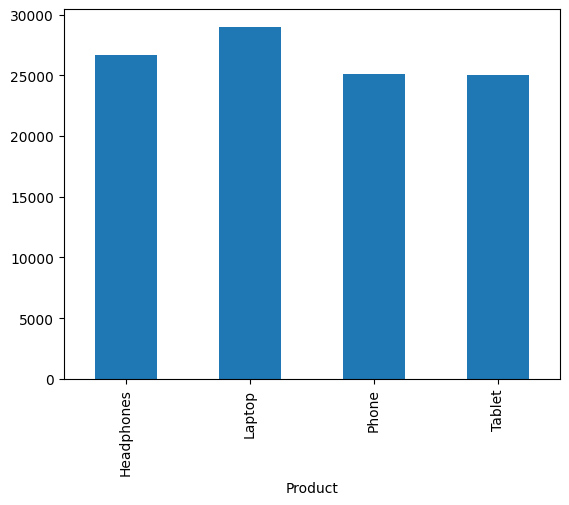

In [49]:
 #월별/지역별/상품별/
sample_df.groupby('Product')['Sales'].sum().plot(kind='bar')